In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Eviction Dataset from: All Cities - Weekly Data https://evictionlab.org/eviction-tracking/get-the-data/
Dataset Dictionary: https://eviction-lab-data-downloads.s3.amazonaws.com/ets/data_dictionary_weekly_monthly.xlsx

In [98]:
#dictionary is: data_dictionary_weekly_monthly.xlsx
eviction_filings = pd.read_csv('https://evictionlab.org/uploads/rhode_island_monthly_2020_2021.csv')
eviction_filings.head(10)

,type,GEOID,month,filings_2020,filings_avg,last_updated
0,Census Tract,44001030100,01/2020,1,1.4,2023-11-04
1,Census Tract,44001030100,02/2020,0,0.2,2023-11-04
2,Census Tract,44001030100,03/2020,0,0.6,2023-11-04
3,Census Tract,44001030100,04/2020,0,0.2,2023-11-04
4,Census Tract,44001030100,05/2020,0,0.4,2023-11-04
5,Census Tract,44001030100,06/2020,0,0.6,2023-11-04
6,Census Tract,44001030100,07/2020,0,0.4,2023-11-04
7,Census Tract,44001030100,08/2020,0,0.4,2023-11-04
8,Census Tract,44001030100,09/2020,0,0.4,2023-11-04
9,Census Tract,44001030100,10/2020,0,0.4,2023-11-04


GEOID: Either Census tract FIPS number or Zip Code, depending on the site. A modest portion of filings are reported to us with missing, incorrect, or out-of-bounds addresses. In these cases, we do not assign a Census Tract or Zip code to the case. Those cases are still included in our overall counts for a given site, but in the “get the data” data files, those cases are not listed under a tract or zip, and are instead listed at the end of the file as “sealed”.

In [99]:
#len(eviction_filings['GEOID'].unique())
#print(eviction_filings['GEOID'].unique())

In [100]:
#zip_tract converting data obtained from https://github.com/covid-19-net/covid-19-community/blob/master/notebooks/dataprep/00m-USHUDCrosswalk.ipynb
zip_tract = pd.read_excel('Data/ZIP_TRACT_032020.xlsx', dtype={0: 'object'})

In [101]:
zip_tract.info()
zip_tract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172121 entries, 0 to 172120
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZIP        172121 non-null  object 
 1   TRACT      172121 non-null  int64  
 2   RES_RATIO  172121 non-null  float64
 3   BUS_RATIO  172121 non-null  float64
 4   OTH_RATIO  172121 non-null  float64
 5   TOT_RATIO  172121 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.9+ MB


,ZIP,TRACT,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,00501,36103158607,0.000000,1.000000,0.000000,1.000000
1,00601,72001956800,0.014816,0.012563,0.044025,0.015412
2,00601,72113071700,0.161060,0.206030,0.132075,0.163171
3,00601,72001956600,0.172913,0.354271,0.358491,0.189069
4,00601,72001956700,0.651211,0.427136,0.465409,0.632348


In [102]:
eviction_filings.info()
eviction_filings['month'] = pd.to_datetime(eviction_filings['month'],format='%m/%Y')
eviction_filings['GEOID_numeric'] = pd.to_numeric(eviction_filings['GEOID'], errors='coerce')
eviction_filings['GEOID_numeric'] = eviction_filings['GEOID_numeric'].fillna(0)
eviction_filings['GEOID_numeric'] = eviction_filings['GEOID_numeric'].astype('Int64')
eviction_filings.info()
eviction_filings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          11515 non-null  object 
 1   GEOID         11515 non-null  object 
 2   month         11515 non-null  object 
 3   filings_2020  11515 non-null  int64  
 4   filings_avg   11515 non-null  float64
 5   last_updated  11515 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 539.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   type           11515 non-null  object        
 1   GEOID          11515 non-null  object        
 2   month          11515 non-null  datetime64[ns]
 3   filings_2020   11515 non-null  int64         
 4   filings_avg    11515 non-null  float64       
 5   last_updated  

,type,GEOID,month,filings_2020,filings_avg,last_updated,GEOID_numeric
0,Census Tract,44001030100,2020-01-01,1,1.4,2023-11-04,44001030100
1,Census Tract,44001030100,2020-02-01,0,0.2,2023-11-04,44001030100
2,Census Tract,44001030100,2020-03-01,0,0.6,2023-11-04,44001030100
3,Census Tract,44001030100,2020-04-01,0,0.2,2023-11-04,44001030100
4,Census Tract,44001030100,2020-05-01,0,0.4,2023-11-04,44001030100
5,Census Tract,44001030100,2020-06-01,0,0.6,2023-11-04,44001030100
6,Census Tract,44001030100,2020-07-01,0,0.4,2023-11-04,44001030100
7,Census Tract,44001030100,2020-08-01,0,0.4,2023-11-04,44001030100
8,Census Tract,44001030100,2020-09-01,0,0.4,2023-11-04,44001030100
9,Census Tract,44001030100,2020-10-01,0,0.4,2023-11-04,44001030100


In [103]:
eviction_filings = pd.merge(eviction_filings, zip_tract, left_on=['GEOID_numeric'], right_on=['TRACT'], how='left')
eviction_filings.columns

Index(['type', 'GEOID', 'month', 'filings_2020', 'filings_avg', 'last_updated',
       'GEOID_numeric', 'ZIP', 'TRACT', 'RES_RATIO', 'BUS_RATIO', 'OTH_RATIO',
       'TOT_RATIO'],
      dtype='object')

In [104]:
eviction_filings = eviction_filings[['ZIP','TRACT','month', 'filings_2020', 'filings_avg', 'last_updated',
       'GEOID_numeric']]

In [105]:
eviction_filings.head(10)

,ZIP,TRACT,month,filings_2020,filings_avg,last_updated,GEOID_numeric
0,02806,4.400103e+10,2020-01-01,1,1.4,2023-11-04,44001030100
1,02915,4.400103e+10,2020-01-01,1,1.4,2023-11-04,44001030100
2,02806,4.400103e+10,2020-02-01,0,0.2,2023-11-04,44001030100
3,02915,4.400103e+10,2020-02-01,0,0.2,2023-11-04,44001030100
4,02806,4.400103e+10,2020-03-01,0,0.6,2023-11-04,44001030100
5,02915,4.400103e+10,2020-03-01,0,0.6,2023-11-04,44001030100
6,02806,4.400103e+10,2020-04-01,0,0.2,2023-11-04,44001030100
7,02915,4.400103e+10,2020-04-01,0,0.2,2023-11-04,44001030100
8,02806,4.400103e+10,2020-05-01,0,0.4,2023-11-04,44001030100
9,02915,4.400103e+10,2020-05-01,0,0.4,2023-11-04,44001030100


## Regarding Tenant’s Rights: What are the number of court filings regarding housing per zip code?

In [117]:
filings_per_zip = eviction_filings.groupby('ZIP')['filings_2020'].sum()
filings_per_zip.head(10)

ZIP
02801     11
02802    181
02804     63
02806     36
02807      5
02808    118
02809    236
02812     41
02813     55
02814     78
Name: filings_2020, dtype: int64

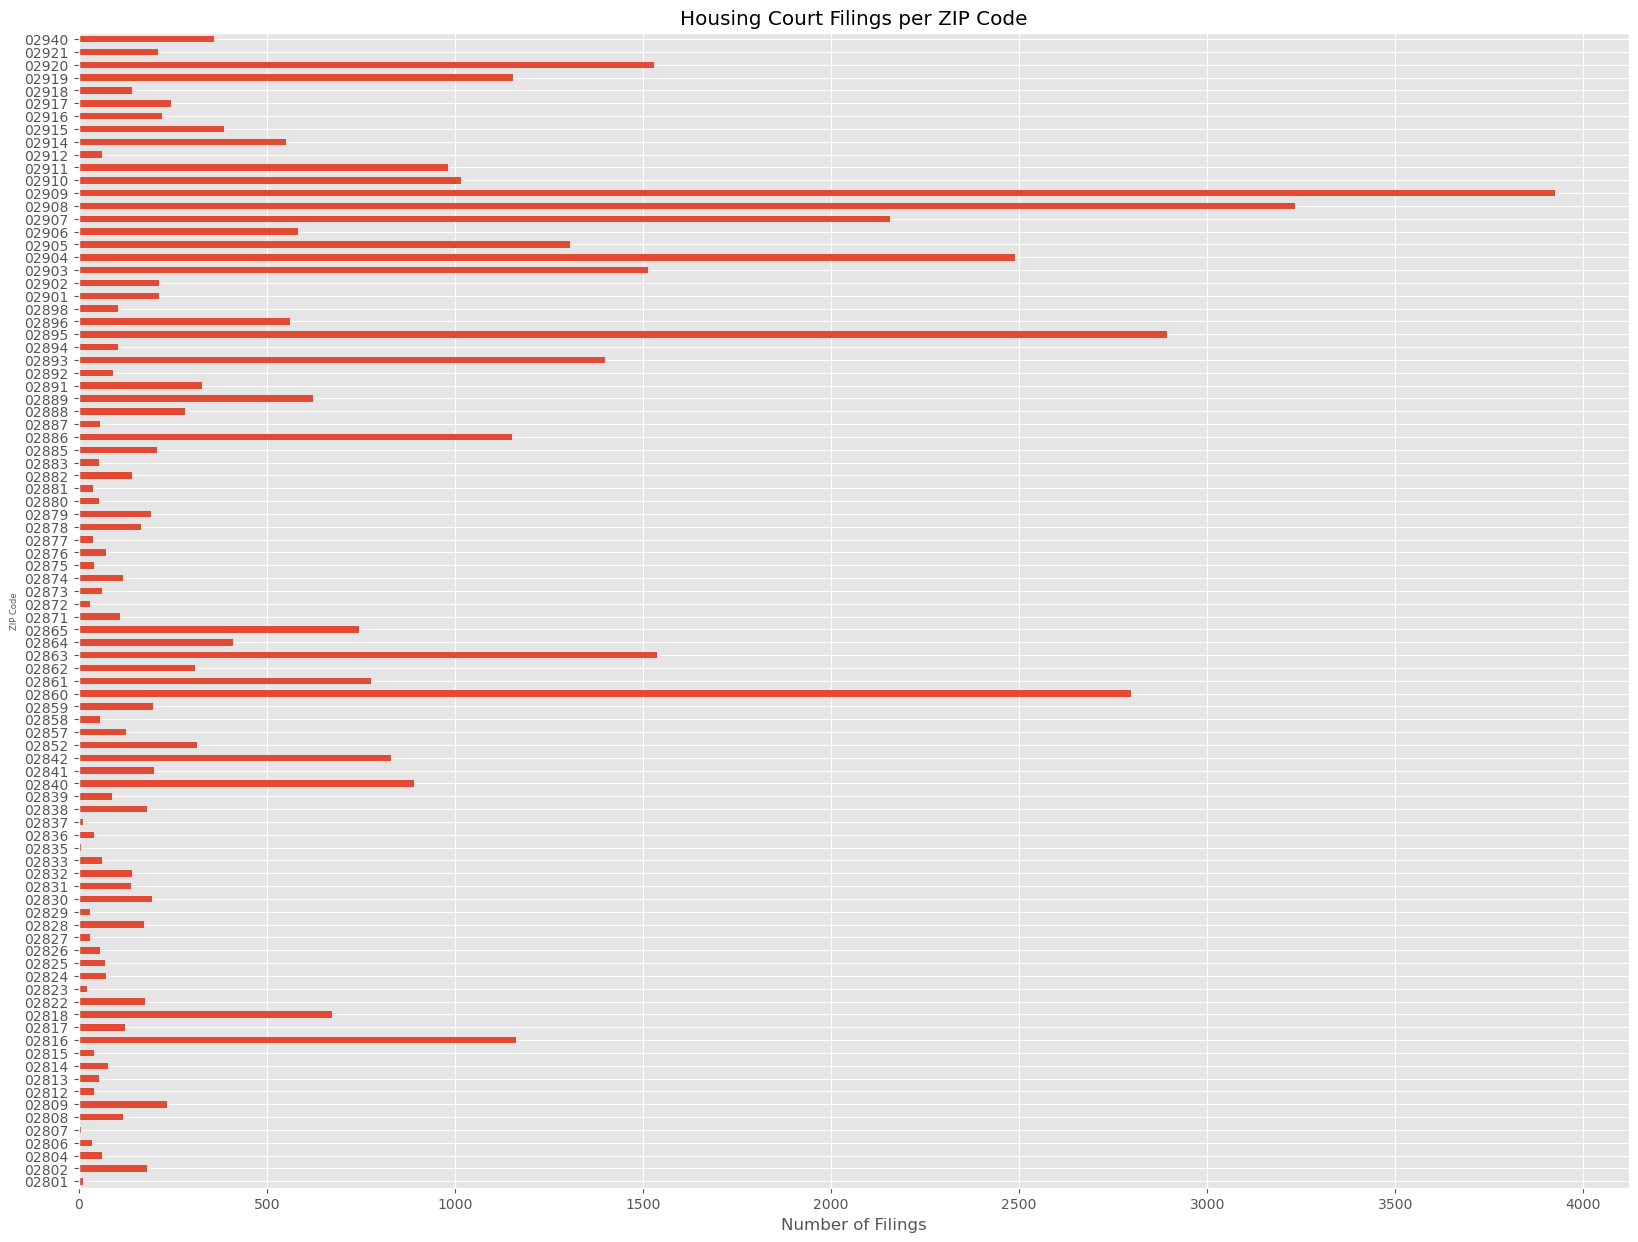

In [133]:
# Creating the bar chart
plt.figure(figsize=(20, 15)) 
filings_per_zip.plot(kind='barh')  # 'barh' creates a horizontal bar chart
plt.ylabel('ZIP Code', fontsize=6)
plt.xlabel('Number of Filings')
plt.title('Housing Court Filings per ZIP Code')
plt.show()

## Regarding Access to Housing Services: What is the prevalence of eviction/housing instability/homelessness by “risk factors” by zip code?

In [141]:
#data obtained from https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html
risk_factors = pd.read_excel('Data/sdoh_2020_tract_1_0 RIonly.xlsx',sheet_name='Data')
risk_factors = risk_factors[['TRACTFIPS','ACS_PCT_UNEMPLOY','ACS_PCT_VET_UNEMPL_18_64','ACS_GINI_INDEX']]

In [142]:
risk_factors.head(10)

,TRACTFIPS,ACS_PCT_UNEMPLOY,ACS_PCT_VET_UNEMPL_18_64,ACS_GINI_INDEX
0,44001030100,4.10,0.00,0.47
1,44001030200,3.47,0.00,0.37
2,44001030300,2.66,0.00,0.42
3,44001030400,0.10,0.00,0.51
4,44001030500,4.57,18.63,0.46
5,44001030601,3.01,0.00,0.38
6,44001030602,4.11,0.00,0.45
7,44001030700,7.55,0.00,0.46
8,44001030800,3.35,0.00,0.39
9,44001030901,2.01,0.00,0.41


In [144]:
result = pd.merge(eviction_filings, risk_factors, left_on=['GEOID_numeric'], right_on=['TRACTFIPS'], how='left')
result.info()
result.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21902 entries, 0 to 21901
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ZIP                       21714 non-null  object        
 1   TRACT                     21714 non-null  float64       
 2   month                     21902 non-null  datetime64[ns]
 3   filings_2020              21902 non-null  int64         
 4   filings_avg               21902 non-null  float64       
 5   last_updated              21902 non-null  object        
 6   GEOID_numeric             21902 non-null  Int64         
 7   TRACTFIPS                 21150 non-null  float64       
 8   ACS_PCT_UNEMPLOY          20962 non-null  float64       
 9   ACS_PCT_VET_UNEMPL_18_64  19411 non-null  float64       
 10  ACS_GINI_INDEX            20962 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 2.

,ZIP,TRACT,month,filings_2020,filings_avg,last_updated,GEOID_numeric,TRACTFIPS,ACS_PCT_UNEMPLOY,ACS_PCT_VET_UNEMPL_18_64,ACS_GINI_INDEX
0,02806,4.400103e+10,2020-01-01,1,1.4,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
1,02915,4.400103e+10,2020-01-01,1,1.4,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
2,02806,4.400103e+10,2020-02-01,0,0.2,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
3,02915,4.400103e+10,2020-02-01,0,0.2,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
4,02806,4.400103e+10,2020-03-01,0,0.6,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
5,02915,4.400103e+10,2020-03-01,0,0.6,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
6,02806,4.400103e+10,2020-04-01,0,0.2,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
7,02915,4.400103e+10,2020-04-01,0,0.2,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
8,02806,4.400103e+10,2020-05-01,0,0.4,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47
9,02915,4.400103e+10,2020-05-01,0,0.4,2023-11-04,44001030100,4.400103e+10,4.1,0.0,0.47


In [151]:
print(result.isna().sum())
result['ZIP'].unique()

ZIP                          188
TRACT                        188
month                          0
filings_2020                   0
filings_avg                    0
last_updated                   0
GEOID_numeric                  0
TRACTFIPS                    752
ACS_PCT_UNEMPLOY             940
ACS_PCT_VET_UNEMPL_18_64    2491
ACS_GINI_INDEX               940
dtype: int64


array(['02806', '02915', '02885', '02809', '02818', '02893', '02816',
       '02886', '02817', '02827', '02831', '02822', '02852', '02888',
       '02889', '02887', '02920', '02871', '02842', '02872', '02840',
       '02841', '02835', '02801', '02837', '02878', nan, '02905', '02907',
       '02910', '02903', '02901', '02902', '02908', '02909', '02919',
       '02911', '02918', '02904', '02940', '02906', '02860', '02912',
       '02916', '02861', '02914', '02863', '02865', '02864', '02895',
       '02802', '02838', '02828', '02917', '02814', '02824', '02876',
       '02896', '02830', '02859', '02826', '02839', '02858', '02825',
       '02857', '02829', '02823', '02815', '02921', '02862', '02807',
       '02874', '02832', '02877', '02892', '02812', '02836', '02875',
       '02894', '02898', '02804', '02808', '02833', '02873', '02891',
       '02813', '02879', '02880', '02882', '02883', '02881'], dtype=object)

In [152]:
result_fillna = result.fillna(0)
print(result_fillna.isna().sum())
print(result_fillna.info())

ZIP                         0
TRACT                       0
month                       0
filings_2020                0
filings_avg                 0
last_updated                0
GEOID_numeric               0
TRACTFIPS                   0
ACS_PCT_UNEMPLOY            0
ACS_PCT_VET_UNEMPL_18_64    0
ACS_GINI_INDEX              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21902 entries, 0 to 21901
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ZIP                       21902 non-null  object        
 1   TRACT                     21902 non-null  float64       
 2   month                     21902 non-null  datetime64[ns]
 3   filings_2020              21902 non-null  int64         
 4   filings_avg               21902 non-null  float64       
 5   last_updated              21902 non-null  object        
 6   GEOID_numeric             21902 non-null  Int64

In [149]:
#import pandas as pd
#import plotly.express as px


# Scatter plot showing eviction filings with respect to unemployment rate
#fig = px.scatter(result_fillna,
#                 x='month',
#                 y='ZIP',
#                 size='filings_2020',  # Size of points representing the number of filings
#                 color='ACS_PCT_UNEMPLOY',  # Color representing the unemployment rate
#                 hover_data=['ACS_GINI_INDEX', 'ACS_PCT_VET_UNEMPL_18_64'],  # Additional info on hover
#                 title='Eviction Filings by GEOID, Month, and Unemployment Rate')

#fig.show()

In [164]:
result_fillna.columns

Index(['ZIP', 'TRACT', 'month', 'filings_2020', 'filings_avg', 'last_updated',
       'GEOID_numeric', 'TRACTFIPS', 'ACS_PCT_UNEMPLOY',
       'ACS_PCT_VET_UNEMPL_18_64', 'ACS_GINI_INDEX'],
      dtype='object')

In [168]:
grouped_sum = result_fillna.groupby('ZIP').agg({'filings_2020': 'sum', 
                                                'ACS_GINI_INDEX': 'mean',
                                                'ACS_PCT_UNEMPLOY':'mean'}).reset_index()

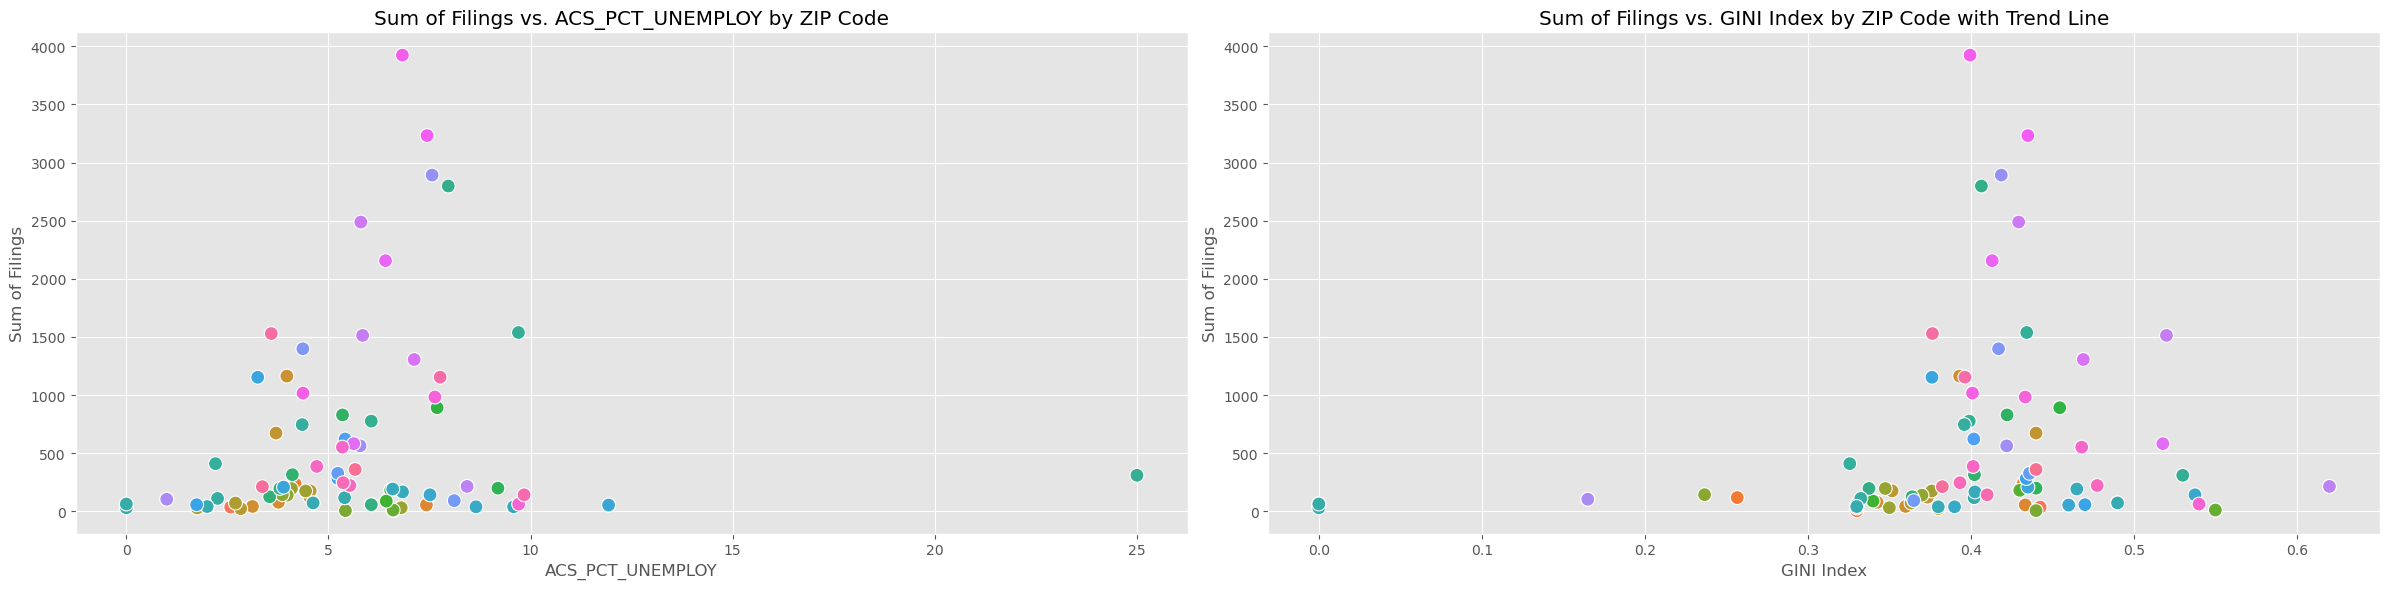

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))


sns.scatterplot(x='ACS_PCT_UNEMPLOY', y='filings_2020', data=grouped_sum, hue='ZIP', s=100, ax=axes[0],legend=False)
axes[0].set_title('Sum of Filings vs. ACS_PCT_UNEMPLOY by ZIP Code')
axes[0].set_xlabel('ACS_PCT_UNEMPLOY')
axes[0].set_ylabel('Sum of Filings')
axes[0].grid(True)


sns.scatterplot(x='ACS_GINI_INDEX', y='filings_2020', data=grouped_sum, hue='ZIP', s=100, ax=axes[1],legend=False)
axes[1].set_title('Sum of Filings vs. GINI Index by ZIP Code with Trend Line')
axes[1].set_xlabel('GINI Index')
axes[1].set_ylabel('Sum of Filings')
axes[1].grid(True)


plt.tight_layout();